In [1]:
import pandas as pd
from datetime import datetime as dt 

In [2]:
df = pd.read_csv('CC_LCL-FullData.csv')

In [3]:
len(df)

167932474

In [4]:
df.isnull().sum()

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64

In [5]:
df.drop('stdorToU',axis=1,inplace=True)

In [7]:
df.head(15)

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0
5,MAC000002,2012-10-12 03:00:00.0000000,0
6,MAC000002,2012-10-12 03:30:00.0000000,0
7,MAC000002,2012-10-12 04:00:00.0000000,0
8,MAC000002,2012-10-12 04:30:00.0000000,0
9,MAC000002,2012-10-12 05:00:00.0000000,0


In [6]:
df.duplicated(subset=['DateTime', 'LCLid']).sum()

115453

In [9]:
df[df.duplicated(subset=['DateTime', 'LCLid'])].head()

,LCLid,DateTime,KWH/hh (per half hour)
383,MAC000002,2012-10-20 00:00:00.0000000,0.2
1823,MAC000002,2012-11-20 00:00:00.0000000,0.258
3312,MAC000002,2012-12-21 00:00:00.0000000,0.238
4801,MAC000002,2013-01-21 00:00:00.0000000,0.21
6290,MAC000002,2013-02-21 00:00:00.0000000,0.216


In [11]:
df.drop_duplicates(subset=['DateTime', 'LCLid'], inplace=True)

In [12]:
df.duplicated(subset=['DateTime', 'LCLid']).sum()

0

In [13]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Create 'Day' column with just the date part of 'DateTime'
df['Day'] = df['DateTime'].dt.normalize()
# Drop the 'DateTime' column
df.drop('DateTime', axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167817021 entries, 0 to 167932473
Data columns (total 3 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   LCLid                    object        
 1   KWH/hh (per half hour)   object        
 2   Day                      datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 5.0+ GB


In [15]:
df.head()

,LCLid,KWH/hh (per half hour),Day
0,MAC000002,0,2012-10-12
1,MAC000002,0,2012-10-12
2,MAC000002,0,2012-10-12
3,MAC000002,0,2012-10-12
4,MAC000002,0,2012-10-12


In [18]:
df[df['Day'] == '2011-11-28']

,LCLid,KWH/hh (per half hour),Day
4354870,MAC000145,0.162,2011-11-28
4354871,MAC000145,0.106,2011-11-28
4354872,MAC000145,0.154,2011-11-28
4354873,MAC000145,0.152,2011-11-28
4354874,MAC000145,0.107,2011-11-28
...,...,...,...
135403405,MAC000198,0.193,2011-11-28
135403406,MAC000198,0.142,2011-11-28
135403407,MAC000198,0.212,2011-11-28
135403408,MAC000198,0.327,2011-11-28


In [21]:
# Convert 'Null' strings to actual NaN values
df['KWH/hh (per half hour) '] = pd.to_numeric(df['KWH/hh (per half hour) '], errors='coerce')

In [25]:
# Now interpolate the missing values using linear interpolation
df['KWH/hh (per half hour) '] = df['KWH/hh (per half hour) '].interpolate(method='linear')

In [26]:
df['KWH/hh (per half hour) '].isnull().sum()

0

In [19]:
df.LCLid.unique()

array(['MAC000002', 'MAC000003', 'MAC000004', ..., 'MAC005557',
       'MAC005564', 'MAC005565'], dtype=object)

**House Count**
> In the dataset we see that the number of households for which energy data was collected across different days are different. This is probably due to the gradually increasing adoption of smart meters in London.  This could lead to false interpretation that the energy for a particular day might be high when it could be that the data was only collected for more number of houses.

In [32]:
grouped_df = df.groupby(['Day', 'LCLid'])['KWH/hh (per half hour) '].sum().reset_index()

In [33]:
len(grouped_df)

3510433

In [34]:
grouped_df.head()

,Day,LCLid,KWH/hh (per half hour)
0,2011-11-23,MAC000145,8.952
1,2011-11-23,MAC000146,5.619
2,2011-11-23,MAC000147,3.036
3,2011-11-23,MAC000148,1.283
4,2011-11-23,MAC000149,2.287


In [35]:
grouped_df.rename(columns={'KWH/hh (per half hour) ': 'Total_Daily_Consumption'}, inplace=True)

In [36]:
housecount = grouped_df.groupby('Day')[['LCLid']].nunique()

<Axes: xlabel='Day'>

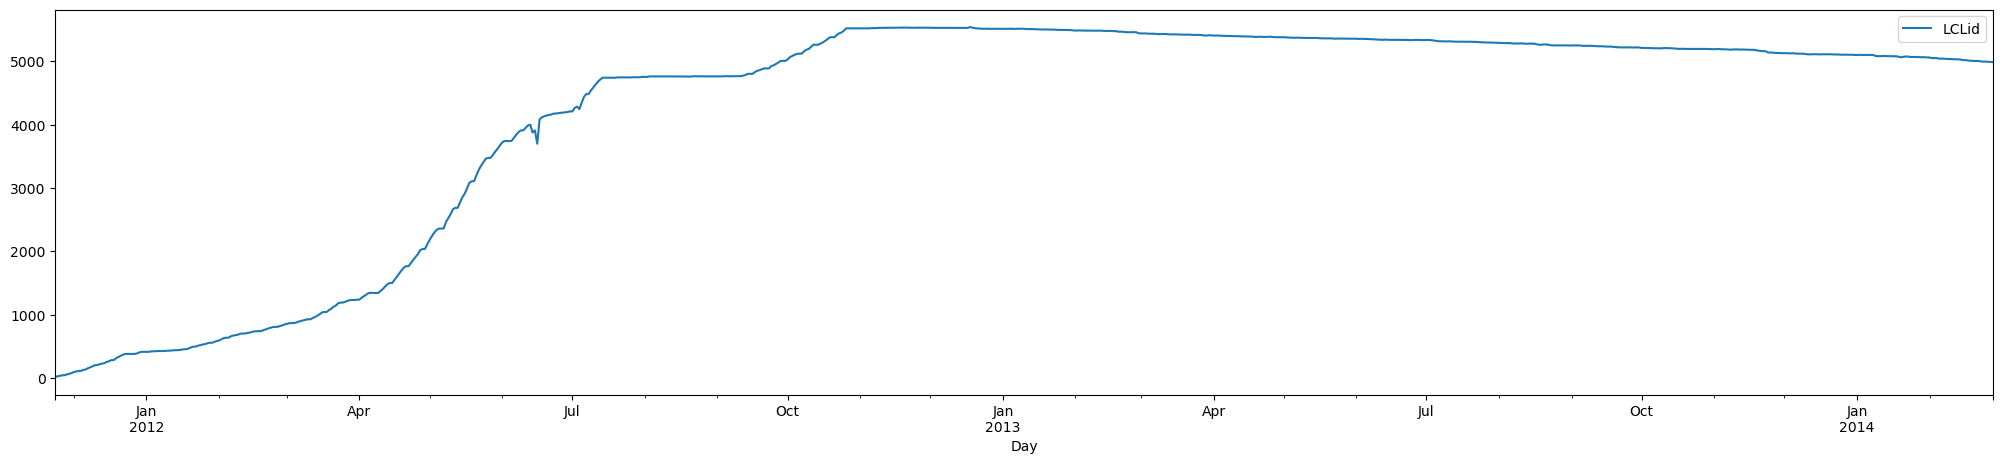

In [37]:
housecount.plot(figsize=(25,5))

In [40]:
# Group 'grouped_df' by 'Day' and sum the 'Total_Daily_Consumption'
grouped_df = grouped_df.groupby('Day')['Total_Daily_Consumption'].sum().reset_index()
# Merge the summed 'grouped_df' with 'housecount' on 'Day'
final_df = grouped_df.merge(housecount, on='Day')
# Reset the index of 'final_df'
final_df = final_df.reset_index(drop=True)


In [41]:
final_df.head()

,Day,Total_Daily_Consumption,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41


In [43]:
len(final_df)

829

In [42]:
final_df.to_hdf('cleaned_energy_data.h5', key='df', mode='w')

### Merging with other factors: weather, holiday

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date as dt
loaded_df = pd.read_hdf('cleaned_energy_data.h5', key='df')

In [2]:
loaded_df['avg_energy'] =  loaded_df['Total_Daily_Consumption']/loaded_df['LCLid']
print("Starting Point of Data at Day Level",min(loaded_df.Day))
print("Ending Point of Data at Day Level",max(loaded_df.Day))

Starting Point of Data at Day Level 2011-11-23 00:00:00
Ending Point of Data at Day Level 2014-02-28 00:00:00


> # Weather Data

In [3]:
weather = pd.read_csv('weather_daily_darksky.csv')
weather.head(4)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25


In [4]:
weather.time.info()

<class 'pandas.core.series.Series'>
RangeIndex: 882 entries, 0 to 881
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
882 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [5]:
weather['Day'] = pd.to_datetime(weather['time'])
weather.drop('time',inplace=True,axis=1)
weather['Day'] = weather['Day'].dt.normalize()

In [6]:
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','Day']]
weather = weather.dropna()

In [7]:
energy_weather=loaded_df.merge(weather,on='Day')
energy_weather.head(2)

,Day,Total_Daily_Consumption,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97


> # Holiday

In [8]:
holiday = pd.read_csv('uk_bank_holidays.csv')
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays']).dt.normalize()
holiday.head(4)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [9]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bank holidays  25 non-null     datetime64[ns]
 1   Type           25 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 532.0+ bytes


In [10]:
Final_DF = energy_weather.merge(holiday, left_on = 'Day',right_on = 'Bank holidays',how = 'left')

In [11]:
Final_DF['holiday_ind'] = np.where(Final_DF['Bank holidays'].isna(),0,1)

In [12]:
Final_DF[Final_DF['holiday_ind']==1]

,Day,Total_Daily_Consumption,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Bank holidays,Type,holiday_ind
70,2012-02-01,8150.828998,590,13.814964,3.36,53,-4.69,0.36,5.45,1032.32,...,-1.86,1.0,-1.66,-0.92,3.36,-5.98,0.29,2012-02-01,New Year?s Day (substitute day),1
136,2012-04-06,14166.792006,1342,10.556477,10.48,2,4.36,0.72,2.09,1012.32,...,10.48,3.0,6.52,6.86,10.48,6.42,0.53,2012-04-06,Spring bank holiday (substitute day),1
166,2012-05-06,25069.815997,2358,10.631813,14.48,160,6.55,0.52,2.54,1014.29,...,14.48,4.0,10.43,5.20,14.48,4.48,0.55,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday),1
195,2012-06-04,33059.635000,3741,8.837112,15.00,160,8.14,0.51,3.42,1014.65,...,15.00,6.0,11.54,7.54,15.00,7.54,0.54,2012-06-04,Good Friday,1
226,2012-07-05,35166.288998,4348,8.087923,18.70,193,13.22,0.39,2.46,1007.45,...,18.70,5.0,13.42,14.78,18.70,14.78,0.60,2012-07-05,Early May bank holiday,1
279,2012-08-27,39589.041998,4761,8.315279,22.50,224,13.49,0.39,4.17,1012.79,...,22.50,4.0,14.74,14.97,22.50,14.97,0.39,2012-08-27,Summer bank holiday,1
287,2012-09-04,39716.142000,4763,8.338472,19.97,5,7.83,0.27,3.26,1026.74,...,19.97,3.0,8.67,12.07,19.97,12.07,0.66,2012-09-04,Easter Monday,1
398,2012-12-25,68988.858001,5515,12.509312,9.14,225,6.27,0.56,4.39,995.66,...,6.49,1.0,4.83,6.46,9.14,3.86,0.41,2012-12-25,Christmas Day,1
399,2012-12-26,64350.884999,5513,11.672571,10.18,230,5.73,0.39,5.05,1004.15,...,10.18,1.0,6.42,4.83,10.18,1.34,0.44,2012-12-26,Boxing Day,1
405,2013-01-01,65269.368001,5513,11.839174,7.49,257,2.40,0.43,4.00,1016.89,...,4.38,1.0,4.42,3.31,5.76,0.23,0.63,2013-01-01,New Year?s Day,1


In [16]:
Final_DF.to_hdf('data.h5',mode = 'w', key = 'df')

C:\Users\souts\AppData\Local\Temp\ipykernel_20760\1085979173.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['Type'], dtype='object')]

  Final_DF.to_hdf('data.h5',mode = 'w', key = 'df')


In [13]:
Final_DF.to_csv('data.csv',mode='w')